<a href="https://colab.research.google.com/github/Tom-snh/DataAnalyse/blob/main/ProjetAnalysePython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse Exploratoire des Ventes d'une Chaine de vente d'electroniques

## Imports


In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importation des données
 

In [169]:
months = ["January","February","March","April","May","June","July","August","September","October","November","December"]

files = [f'https://raw.githubusercontent.com/kevindegila/data-analyst/main/datasets/SalesAnalysis/Sales_Data/Sales_{m}_2019.csv' for m in months]
files

['https://raw.githubusercontent.com/kevindegila/data-analyst/main/datasets/SalesAnalysis/Sales_Data/Sales_January_2019.csv',
 'https://raw.githubusercontent.com/kevindegila/data-analyst/main/datasets/SalesAnalysis/Sales_Data/Sales_February_2019.csv',
 'https://raw.githubusercontent.com/kevindegila/data-analyst/main/datasets/SalesAnalysis/Sales_Data/Sales_March_2019.csv',
 'https://raw.githubusercontent.com/kevindegila/data-analyst/main/datasets/SalesAnalysis/Sales_Data/Sales_April_2019.csv',
 'https://raw.githubusercontent.com/kevindegila/data-analyst/main/datasets/SalesAnalysis/Sales_Data/Sales_May_2019.csv',
 'https://raw.githubusercontent.com/kevindegila/data-analyst/main/datasets/SalesAnalysis/Sales_Data/Sales_June_2019.csv',
 'https://raw.githubusercontent.com/kevindegila/data-analyst/main/datasets/SalesAnalysis/Sales_Data/Sales_July_2019.csv',
 'https://raw.githubusercontent.com/kevindegila/data-analyst/main/datasets/SalesAnalysis/Sales_Data/Sales_August_2019.csv',
 'https://raw.

In [170]:
df = pd.DataFrame()

for file in files:
  tmp = pd.read_csv(file)
  df = pd.concat([df,tmp])

df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


## Prétraitement

In [171]:
print("--- DataFrame shape ---\n")
print(df.shape)

print("\n--- DataFrame columns ---\n")
print(df.columns)

print("\n\n--- DataFrame description ---\n")
print(df.describe())

print("\n\n--- DatafRame information ---\n")
print(df.info())

--- DataFrame shape ---

(186850, 6)

--- DataFrame columns ---

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')


--- DataFrame description ---

        Order ID               Product  ...  Order Date  Purchase Address
count     186305                186305  ...      186305            186305
unique    178438                    20  ...      142396            140788
top     Order ID  USB-C Charging Cable  ...  Order Date  Purchase Address
freq         355                 21903  ...         355               355

[4 rows x 6 columns]


--- DatafRame information ---

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   

### Gestion des valeurs manquantes

In [172]:
print("--- Nombre de valeurs manquantes ---\n")
df.isnull().sum(axis=0)

--- Nombre de valeurs manquantes ---



Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

Nous avons 545 valeurs vides dans chaqus variables. Nous allons créer un dataset contenant ces valeurs vides pour nous aider à mieux comprendre d'où elles proviennent.

In [173]:
df_vide = df[df.isnull().any(axis=1)]
df_vide

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
22945,NaN,NaN,NaN,NaN,NaN,NaN
22962,NaN,NaN,NaN,NaN,NaN,NaN
23309,NaN,NaN,NaN,NaN,NaN,NaN
23996,NaN,NaN,NaN,NaN,NaN,NaN


Maintenant que nous avons un visuel sur ces valeurs vides, nous nous demandons s'il est possible de les supprimer.<br>Vérifions si toutes les lignes de ce DataFrame sont vides.

In [174]:
df_vide.isnull().all()

Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
dtype: bool

In [175]:
df.dropna(inplace=True)

In [176]:
print("--- New DataFrame shape ---\n")
print(df.shape)

print("\n--- New DataFrame columns ---\n")
print(df.columns)

print("\n\n--- New DataFrame description ---\n")
print(df.describe())

print("\n\n--- New DatafRame information ---\n")
print(df.info())

--- New DataFrame shape ---

(186305, 6)

--- New DataFrame columns ---

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')


--- New DataFrame description ---

        Order ID               Product  ...  Order Date  Purchase Address
count     186305                186305  ...      186305            186305
unique    178438                    20  ...      142396            140788
top     Order ID  USB-C Charging Cable  ...  Order Date  Purchase Address
freq         355                 21903  ...         355               355

[4 rows x 6 columns]


--- New DatafRame information ---

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-nu

Les données manquantes sont supprimées. Mais on remarque certaines valeurs abérantes, notamment la valeurs sla plus fréquente dans la colonne 'Order ID' qui n'est pas numérique.<br>Voyons cela.

### Valeurs abérantes

In [177]:
df[df["Order Date"] == "Order Date"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
23198,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
23337,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
23748,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
24192,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [178]:
# On supprime les lignes dans lesquelles Order Date n'est pas au format attendu

df_clean = df.drop(df.loc[df["Order Date"] == "Order Date", :].index)
df_clean

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [179]:
df_clean.loc[~df_clean["Order ID"].str.isdigit(), :]

# Equivalent à df_clean[df_clean["Order ID"] == "Order ID"]
# ~ représente le contraire (!)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


### Changement des types

In [180]:
df_clean["Quantity Ordered"] = df_clean["Quantity Ordered"].astype("int")
df_clean["Price Each"] = pd.to_numeric(df_clean["Price Each"])
df_clean["Order Date"] = pd.to_datetime(df_clean["Order Date"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [181]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182735 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          182735 non-null  object        
 1   Product           182735 non-null  object        
 2   Quantity Ordered  182735 non-null  int64         
 3   Price Each        182735 non-null  float64       
 4   Order Date        182735 non-null  datetime64[ns]
 5   Purchase Address  182735 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.8+ MB


Maintenant que les données sont "propres", nous allons effectuer quelques analyses permettant de répondre à quelques questions que nous nous posons.

## Analyses

### Quel est le meilleur mois de vente ? Quel est son chiffre d'affaire ?

Pour déterminer le meilleur mois de vente, nous devons avoir accès au mois de chque enregistrements. Pour ce faire, nous allons dans un premier temps passer "Order Date" en index et créer une colonne "Month".

In [182]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


In [183]:
# Changement de l'index

df_clean = df_clean.set_index("Order Date")

In [184]:
df_clean.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
Order Date,,,,,
2019-10-21 17:22:00,264334,USB-C Charging Cable,1,11.95,"381 4th St, Atlanta, GA 30301"
2019-12-13 00:30:00,297357,Flatscreen TV,1,300.00,"725 Lakeview St, San Francisco, CA 94016"
2019-01-31 17:48:00,143707,Flatscreen TV,1,300.00,"750 Main St, Seattle, WA 98101"
2019-03-30 12:55:00,174005,20in Monitor,1,109.99,"899 8th St, Los Angeles, CA 90001"
2019-04-25 01:18:00,190432,Apple Airpods Headphones,1,150.00,"26 1st St, Los Angeles, CA 90001"


In [185]:
# Création de la variable Mois

df_clean["Month"] = df_clean.index.month_name()
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month
Order Date,,,,,,
2019-01-22 21:25:00,141234,iPhone,1,700.00,"944 Walnut St, Boston, MA 02215",January
2019-01-28 14:15:00,141235,Lightning Charging Cable,1,14.95,"185 Maple St, Portland, OR 97035",January
2019-01-17 13:33:00,141236,Wired Headphones,2,11.99,"538 Adams St, San Francisco, CA 94016",January
2019-01-05 20:33:00,141237,27in FHD Monitor,1,149.99,"738 10th St, Los Angeles, CA 90001",January
2019-01-25 11:59:00,141238,Wired Headphones,1,11.99,"387 10th St, Austin, TX 73301",January


In [186]:
# On crée une colonne Turnover pour déterminer le CA maximum

df_clean["Turnover"] = df_clean["Quantity Ordered"] * df_clean["Price Each"]
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Turnover
Order Date,,,,,,,
2019-01-22 21:25:00,141234,iPhone,1,700.00,"944 Walnut St, Boston, MA 02215",January,700.00
2019-01-28 14:15:00,141235,Lightning Charging Cable,1,14.95,"185 Maple St, Portland, OR 97035",January,14.95
2019-01-17 13:33:00,141236,Wired Headphones,2,11.99,"538 Adams St, San Francisco, CA 94016",January,23.98
2019-01-05 20:33:00,141237,27in FHD Monitor,1,149.99,"738 10th St, Los Angeles, CA 90001",January,149.99
2019-01-25 11:59:00,141238,Wired Headphones,1,11.99,"387 10th St, Austin, TX 73301",January,11.99


In [187]:
print("--- Chiffre d'affaire de chaque mois ---")
df_clean.groupby("Month")["Turnover"].sum()

--- Chiffre d'affaire de chaque mois ---


Month
April        3336376.42
August       2191698.31
December     4557905.42
February     2158127.48
January      1786511.29
July         2587444.91
June         2524464.99
March        2755969.40
May          3101881.04
November     3149785.09
October      3679254.16
September    2050361.26
Name: Turnover, dtype: float64

In [188]:
print("--- Mois ayant le plus grand chiffre d'affaire ---")
df_clean.groupby("Month")["Turnover"].sum().sort_values(ascending=False)

--- Mois ayant le plus grand chiffre d'affaire ---


Month
December     4557905.42
October      3679254.16
April        3336376.42
November     3149785.09
May          3101881.04
March        2755969.40
July         2587444.91
June         2524464.99
August       2191698.31
February     2158127.48
September    2050361.26
January      1786511.29
Name: Turnover, dtype: float64

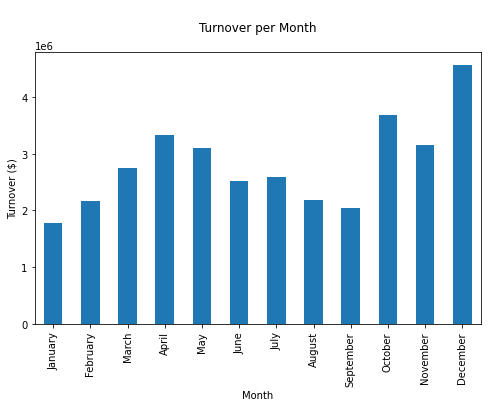

In [189]:
x = df_clean["Month"].unique()

df_clean.groupby("Month")["Turnover"].sum().loc[x].plot.bar(figsize=(8,5))
plt.title("\nTurnover per Month\n")
plt.ylabel("Turnover ($)")
plt.show()

Décembre est le mois avec le plus grand chiffre d'affaire, égale à 4557905.42$.

### Dans quelle ville a-t-on vendu le plus de produits ?

Analysons la variable "Purchase Address"

In [190]:
df_clean["Purchase Address"].unique()

array(['944 Walnut St, Boston, MA 02215',
       '185 Maple St, Portland, OR 97035',
       '538 Adams St, San Francisco, CA 94016', ...,
       '273 Wilson St, Seattle, WA 98101',
       '778 River St, Dallas, TX 75001',
       '747 Chestnut St, Los Angeles, CA 90001'], dtype=object)

Au vu du format, la ville est positionnée après la première virgule.<br>Voyons comment récupére cet élément.

In [191]:
def get_city(addr):
  return addr.split(",")[1].strip() # strip() supprime les espaces

In [192]:
df_clean["City"] = df_clean["Purchase Address"].apply(get_city)
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Turnover,City
Order Date,,,,,,,,
2019-01-22 21:25:00,141234,iPhone,1,700.00,"944 Walnut St, Boston, MA 02215",January,700.00,Boston
2019-01-28 14:15:00,141235,Lightning Charging Cable,1,14.95,"185 Maple St, Portland, OR 97035",January,14.95,Portland
2019-01-17 13:33:00,141236,Wired Headphones,2,11.99,"538 Adams St, San Francisco, CA 94016",January,23.98,San Francisco
2019-01-05 20:33:00,141237,27in FHD Monitor,1,149.99,"738 10th St, Los Angeles, CA 90001",January,149.99,Los Angeles
2019-01-25 11:59:00,141238,Wired Headphones,1,11.99,"387 10th St, Austin, TX 73301",January,11.99,Austin


In [193]:
print("--- Nombre de produits vendus par ville ---\n")
df_clean.groupby("City")["Quantity Ordered"].sum().sort_values(ascending=False)

--- Nombre de produits vendus par ville ---



City
San Francisco    49363
Los Angeles      32722
New York City    27470
Boston           22123
Dallas           16453
Atlanta          16304
Seattle          16281
Portland         13806
Austin           10933
Name: Quantity Ordered, dtype: int64

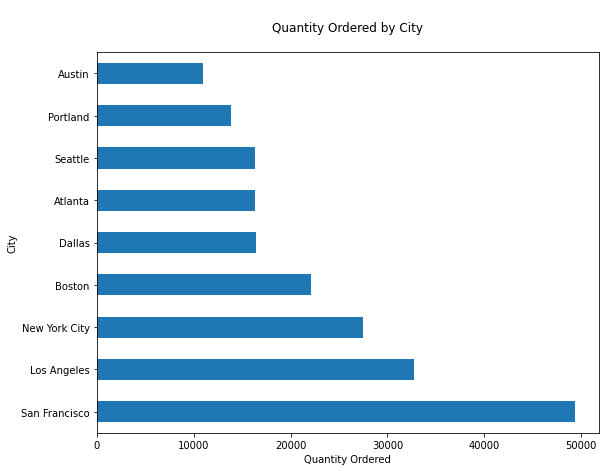

In [194]:
x = df_clean["City"].unique()

df_clean.groupby("City")["Quantity Ordered"].sum().loc[x].sort_values(ascending=False).plot.barh(figsize=(9,7))
plt.title("\nQuantity Ordered by City\n")
plt.xlabel("Quantity Ordered")
plt.ylabel("City")
plt.show()

San fransisco est la ville ayant le plus vendu, avec un total de 49363 produits.

### A quelle heure devons-nous passer de la publicité pour augnmenter nos ventes ?

Pour répondre à cette question, nous allons visualiser le CA par heure.<br>Créons d'abord la variable "Hour".

In [195]:
df_clean["Hour"] = df_clean.index.hour
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Turnover,City,Hour
Order Date,,,,,,,,,
2019-01-22 21:25:00,141234,iPhone,1,700.00,"944 Walnut St, Boston, MA 02215",January,700.00,Boston,21
2019-01-28 14:15:00,141235,Lightning Charging Cable,1,14.95,"185 Maple St, Portland, OR 97035",January,14.95,Portland,14
2019-01-17 13:33:00,141236,Wired Headphones,2,11.99,"538 Adams St, San Francisco, CA 94016",January,23.98,San Francisco,13
2019-01-05 20:33:00,141237,27in FHD Monitor,1,149.99,"738 10th St, Los Angeles, CA 90001",January,149.99,Los Angeles,20
2019-01-25 11:59:00,141238,Wired Headphones,1,11.99,"387 10th St, Austin, TX 73301",January,11.99,Austin,11


Groupons maintenant le CA par heure.

In [196]:
ca_par_heure = pd.DataFrame(df_clean.groupby("Hour")["Turnover"].sum())
ca_par_heure

,Turnover
Hour,
0,698694.76
1,447663.86
2,234191.08
3,142976.54
4,161350.57
5,224313.72
6,441523.14
7,734595.75
8,1181363.76


Donnons un aperçu graphique.

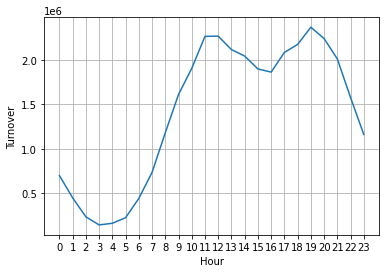

In [197]:
sns.lineplot(data=ca_par_heure["Turnover"])
plt.xticks(ticks=range(0,24))
plt.grid()
plt.show()

### Quels sont les produits qui sont souvent achetés ensemble ?

Deux produits vendus ensemble ont le même "Order ID".

In [198]:
# Affiche tout les doublons

df_m = df_clean[df_clean["Order ID"].duplicated(keep=False)].copy()
df_m

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Turnover,City,Hour
Order Date,,,,,,,,,
2019-01-07 16:06:00,141275,USB-C Charging Cable,1,11.95,"610 Walnut St, Austin, TX 73301",January,11.95,Austin,16
2019-01-07 16:06:00,141275,Wired Headphones,1,11.99,"610 Walnut St, Austin, TX 73301",January,11.99,Austin,16
2019-01-02 08:25:00,141290,Apple Airpods Headphones,1,150.00,"4 1st St, Los Angeles, CA 90001",January,150.00,Los Angeles,8
2019-01-02 08:25:00,141290,AA Batteries (4-pack),3,3.84,"4 1st St, Los Angeles, CA 90001",January,11.52,Los Angeles,8
2019-01-10 11:19:00,141365,Vareebadd Phone,1,400.00,"20 Dogwood St, New York City, NY 10001",January,400.00,New York City,11
...,...,...,...,...,...,...,...,...,...
2019-12-11 00:30:00,319584,Wired Headphones,1,11.99,"537 Sunset St, Portland, OR 97035",December,11.99,Portland,0
2019-12-01 08:44:00,319596,iPhone,1,700.00,"436 14th St, New York City, NY 10001",December,700.00,New York City,8
2019-12-01 08:44:00,319596,Lightning Charging Cable,1,14.95,"436 14th St, New York City, NY 10001",December,14.95,New York City,8


In [199]:
def concat_product(p: list):
  return ";".join(p)

In [200]:
ensemble = df_m.groupby("Order ID")["Product"].apply(concat_product)
ensemble

Order ID
141275              USB-C Charging Cable;Wired Headphones
141290     Apple Airpods Headphones;AA Batteries (4-pack)
141365                   Vareebadd Phone;Wired Headphones
141384                  Google Phone;USB-C Charging Cable
141450            Google Phone;Bose SoundSport Headphones
                               ...                       
319536                Macbook Pro Laptop;Wired Headphones
319556                      Google Phone;Wired Headphones
319584                            iPhone;Wired Headphones
319596                    iPhone;Lightning Charging Cable
319631    34in Ultrawide Monitor;Lightning Charging Cable
Name: Product, Length: 6928, dtype: object

In [201]:
from itertools import combinations # renvoie le nombre de combinaisons uniques possibles
from collections import Counter # compte le nombre d'occurence dans une liste

count = Counter()

In [202]:
print("--- Exemple ---\n")
list(combinations(["a", "b", "c", "d"],3))

--- Exemple ---



[('a', 'b', 'c'), ('a', 'b', 'd'), ('a', 'c', 'd'), ('b', 'c', 'd')]

In [203]:
for achat in ensemble.to_list():
  products = achat.split(";")
  print(products)
  count.update(Counter(combinations(products,2)))
  break

['USB-C Charging Cable', 'Wired Headphones']


In [204]:
count

Counter({('USB-C Charging Cable', 'Wired Headphones'): 1})

In [205]:
count.most_common(1)

[(('USB-C Charging Cable', 'Wired Headphones'), 1)]